In [1]:
import sys, os
clones_path = os.path.abspath('..')
if clones_path not in sys.path:
    sys.path.insert(0, clones_path)
    
import numpy as np
import matplotlib.pyplot as plt
from growth.sweep.sweep import Sweep
from clones.annotation.validation.simulation import SimulationBenchmark
from clones.annotation.bayesian import BayesianClassifier

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
ls ../../growth/simulations/

Sweep_181121_235632/      Sweep_181128_214024/
Sweep_181121_235632 copy/ sweep_pop12_b1/


In [3]:
sweep_path = '../../growth/simulations/Sweep_181128_214024'
sweep = Sweep.load(sweep_path)

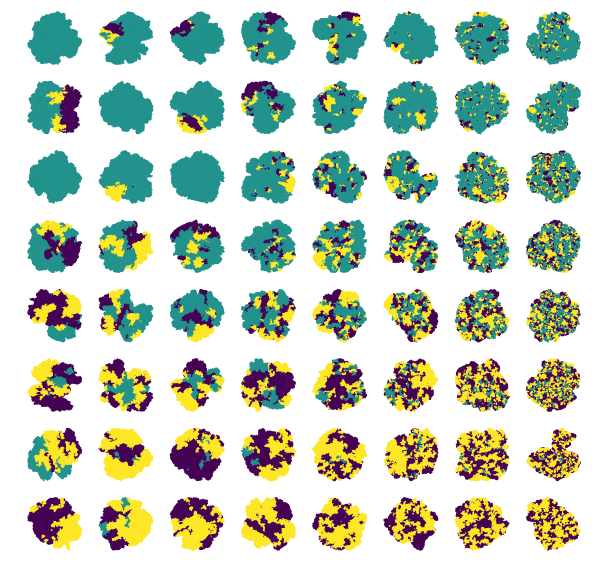

In [4]:
fig = sweep.plot_culture_grid(figsize=(10, 10), title=False, s=3)

# select batch

In [5]:
batch = sweep.batches[4, 0]

In [36]:
sweep.num_batches

64

In [35]:
sweep.path

'../../growth/simulations/Sweep_181128_214024'

# evaluate benchmark

In [6]:
from clones.annotation.validation import BatchBenchmark
from clones.annotation.validation import SimulationBenchmark

In [7]:
benchmark = BatchBenchmark(batch, scale=3, num_replicates=5)

In [16]:
benchmark.results

simple  community
growth_replicate fluorescence_replicate                     
0                0                       0.119536   0.056472
                 1                       0.124552   0.051500
                 2                       0.112391   0.045298
                 3                       0.125760   0.053187
                 4                       0.117291   0.053670
1                0                       0.065444   0.016757
                 1                       0.068614   0.023098
                 2                       0.066803   0.015851
                 3                       0.068614   0.018342
                 4                       0.074955   0.012002
2                0                       0.133255   0.075328
                 1                       0.118488   0.052217
                 2                       0.120851   0.067250
                 3                       0.111758   0.047793
                 4                       0.111564   0.046454
3                0                       0.118920   0.059969
                 1                       0.122228   0.070526
                 2                       0.119904   0.060673
                 3                       0.121070   0.081027
                 4                       0.120590   0.073009
4                0                       0.112496   0.060884
                 1                       0.132273   0.055756
                 2                       0.111974   0.054515
                 3                       0.122141   0.069607
                 4                       0.117030   0.052814
5                0                       0.143143   0.060306
                 1                       0.132529   0.056828
                 2                       0.146439   0.063484
                 3                       0.133936   0.059545
                 4                       0.136587   0.061633
...                                           ...        ...
19               0                       0.117651   0.058189
                 1                       0.120886   0.064425
                 2                       0.121212   0.068055
                 3                       0.122032   0.064499
                 4                       0.118099   0.066844
20               0                       0.140251   0.067953
                 1                       0.138287   0.063107
                 2                       0.140689   0.055688
                 3                       0.141823   0.062864
                 4                       0.145831   0.071514
21               0                       0.129258   0.084563
                 1                       0.121663   0.072634
                 2                       0.111278   0.062468
                 3                       0.104777   0.056960
                 4                       0.138454   0.081967
22               0                       0.129729   0.073084
                 1                       0.121005   0.067482
                 2                       0.116941   0.074214
                 3                       0.113320   0.069502
                 4                       0.122975   0.066785
23               0                       0.124677   0.061537
                 1                       0.120188   0.060800
                 2                       0.121862   0.057981
                 3                       0.120029   0.047851
                 4                       0.119689   0.071409
24               0                       0.107657   0.054315
                 1                       0.117761   0.077519
                 2                       0.125062   0.097569
                 3                       0.123085   0.058409
                 4                       0.112265   0.086261

[125 rows x 2 columns]

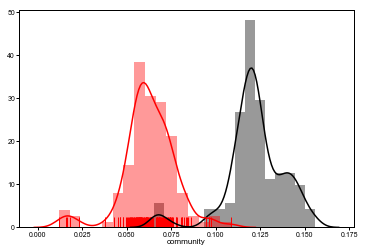

In [8]:
import seaborn as sns
fig, ax = plt.subplots()
sns.distplot(benchmark.results.simple, ax=ax, color='k')
sns.distplot(benchmark.results.community, ax=ax, rug=True, color='r')

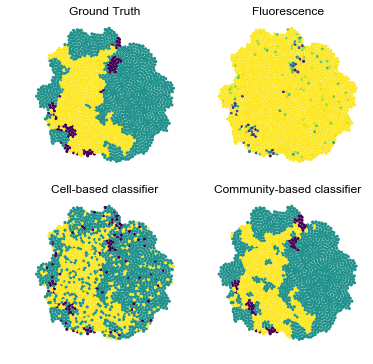

In [31]:
example = benchmark[benchmark.results.community.idxmax()]
example.show()

In [32]:
example.community_MAE

0.10841903598491748

In [ ]:
example.s

In [13]:
benchmark

5

In [19]:
import dill as pickle

# sample data

In [19]:
scale = 10
fluorescence_replicates = 1
data = batch.measure(scale=scale, replicates=fluorescence_replicates)

# train classifier

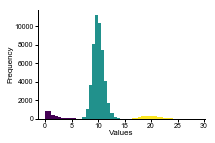

In [20]:
classify_on = 'r'
classifier = BayesianClassifier(data[classify_on].values, classify_on=classify_on)
classifier.show()

# apply to batch

In [ ]:
SimulationBenchmark

In [21]:
results = {}
for replicate_id, replicate in data.groupby(['growth_replicate', 'fluorescence_replicate']):
    print(replicate_id)
    #benchmark = Benchmark(replicate, classifier=classifier, rule='weighted', twolevel=True)
    #results[replicate_id] = [benchmark.simple_MAE, benchmark.community_MAE]

(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(8, 0)
(9, 0)
(10, 0)
(11, 0)
(12, 0)
(13, 0)
(14, 0)
(15, 0)
(16, 0)
(17, 0)
(18, 0)
(19, 0)
(20, 0)
(21, 0)
(22, 0)
(23, 0)
(24, 0)


In [ ]:
simple, community = np.vstack(list(results.values())).T

fig, ax = plt.subplots()
_ = ax.hist(simple, bins=50, color='b')
_ = ax.hist(community, bins=50, color='r')

In [25]:
adict = {}

for x in [(0,0), (1,2), (3, 3)]:
    
    adict[x] = dict(a=1, b=x[1])


In [41]:
df = pd.DataFrame.from_dict(adict, orient='index')
df.index.set_names(['AAA', 'BBB'], inplace=True)
df

,,a,b
AAA,BBB,,
0,0,1,0
1,2,1,2
3,3,1,3


In [27]:
import pandas as pd

In [ ]:
benchmark.show()

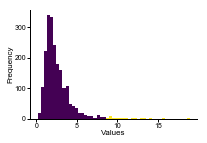

In [92]:
benchmark.cell_classifier.show()

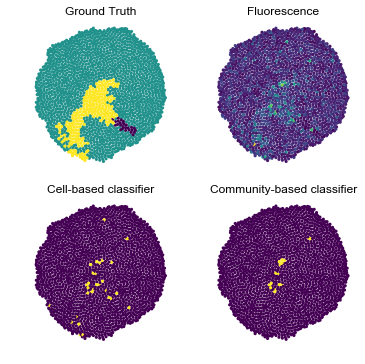

In [93]:
benchmark.show()

In [66]:
from clones.annotation.bayesian import BayesianClassifier

In [ ]:
"""
1. write method to aggregate batches
2. train cell classifier on whole batch
3. try merging clusters that improve posterior likelihood
4. run scoring on all simulations

"""

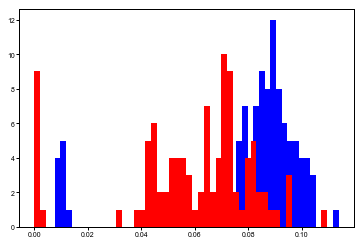